# Comparitive Analysis of Crime in New York and Los Angeles

The first step is to import any and all required libraries. Here we import folium a library used to create convenient map API and the numpy and pandas library in order to use the numpy and pandas database functions which makes modifying, adjusting, and comparing the datasets much easier.

In [3]:
import folium
import pandas as pd
import numpy


The next step is to import our datasets. We are looking to compare crime in major cities on the east coast vs the west coast. In order to do this we will look at case studies between New York and Los Angelos, the two biggest cities on each coast (by biggest we mean most populated). 

We will start by importing the LA dataset. The crime dataset we are using for LA is provided by the local Los Angeles government for years 2010 to 2019. I have downloaded the csv file and uploaded them to Jupyter notebook so that we can read the file into a pandas data table using the pandas read_csv function. 

In [4]:
la = pd.read_csv("LA_CrimeData_2010-2019.csv")
la.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


Additionally, I downloaded the dataset for New York City crimes from NYPD open data, which shows the data of crimes in New York City from the years 2006 to 2019. I uploaded it to Jupyter notebook in order to be able to read it using the pandas read_csv function into a data table. 

In [5]:

# #read data in chunks of 1 million rows at a time
ny = pd.read_csv('NY_CrimeData_2006-2019.csv')
ny


/var/folders/31/9b359gh120dg0d797hfp54z00000gn/T/ipykernel_5384/2873729367.py:2: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ny = pd.read_csv('NY_CrimeData_2006-2019.csv')


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375988,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,NaN,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
7375989,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M
7375990,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,NaN,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F
7375991,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,NaN,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M


Now we want to clean up the database so that we are only looking at data from the years 2010 to 2019 since our more restricted data set (the LA dataset) only has dates from 2010-2019. This way we will be comparing data from both sides of the coast during the same time period.

Let's start with LA. Although the data provided is from 2010-2019, we will run through the process of cleaning the dates for future use and in order to be extra careful. 
Here we run into one issue: the date and time are grouped into one column. We will split this column into day and month, year, and time. 

Here we are parsing the column in the LA dataset using the str.split function and appending the time and whether it occured in the AM or PM together into a new time column in the database. 

In [6]:
la['TIME']=(la['DATE OCC'].str.split().str[1])+(la['DATE OCC'].str.split().str[2])


Now we will parse the same original LA dataset data-and-time column to create a new column for the date again using the str.split function.

In [7]:
la['DATE']=(la['DATE OCC'].str.split().str[0])
la['DATE']

0          02/20/2010
1          09/12/2010
2          08/09/2010
3          01/05/2010
4          01/02/2010
              ...    
2060943    03/28/2019
2060944    08/14/2019
2060945    01/06/2019
2060946    10/16/2019
2060947    02/01/2019
Name: DATE, Length: 2060948, dtype: object

In order to make our life easier, we will create a column to only hold the year, so that we can easily check to see which rows we would want to drop in order to only have data for 2010-2019. We use the str.split function to isolate the year and the astype function to change the year from being stored as a string to being stored as an int. 

In [8]:
la['YEAR']=la['DATE'].str.split('/').str[2]
la['YEAR']=la['YEAR'].astype(int)

la['YEAR']

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
2060943    2019
2060944    2019
2060945    2019
2060946    2019
2060947    2019
Name: YEAR, Length: 2060948, dtype: int64

 Now that we have the columns for date and time parsed, we can remove all rows that do not fall under the year 2010-2019. 

In [9]:
la = la[la['YEAR'] >= 2010]
la = la[la['YEAR']<=2019]
la

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME,DATE,YEAR
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,12:00:00AM,02/20/2010,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,12:00:00AM,09/12/2010,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,12:00:00AM,08/09/2010,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,12:00:00AM,01/05/2010,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,12:00:00AM,01/02/2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060943,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,12:00:00AM,03/28/2019,2019
2060944,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732,12:00:00AM,08/14/2019,2019
2060945,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,12:00:00AM,01/06/2019,2019
2060946,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085,12:00:00AM,10/16/2019,2019


Now we will repeat this process for the NYC database, specifically on the from date and time. We are not concerned about the duration of the crime.
Additionally, we will relabel the time and date columns so that it mirrors that of the la database.

In [10]:
ny

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375988,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,NaN,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
7375989,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M
7375990,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,NaN,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F
7375991,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,NaN,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M


In [11]:
#Here we are renaming the time column. 
ny['TIME']= ny['CMPLNT_FR_TM']
ny['TIME']

0          17:30:00
1          16:31:00
2          18:45:00
3          01:00:00
4          21:41:00
             ...   
7375988    03:00:00
7375989    23:30:00
7375990    08:30:00
7375991    07:30:00
7375992    11:30:00
Name: TIME, Length: 7375993, dtype: object

In [12]:
ny['DATE']=(ny['CMPLNT_FR_DT'].str.split().str[0])
ny['DATE']

0          12/31/2019
1          12/29/2019
2          12/15/2019
3          12/28/2019
4          09/05/2008
              ...    
7375988    12/17/2018
7375989    06/05/2018
7375990    02/10/2018
7375991    12/11/2018
7375992    05/10/2018
Name: DATE, Length: 7375993, dtype: object

Before we can continue with parsing the date data, we have to decide how we want to deal with missing date and time data. Because the dataset lacks context for us to be able to make a hypothesis about whem the missing crimes were committed and it doesn't make sense to assign an average date and time, we will remove the rows with missing date and time values. (Note: we did not run into this issue in the LA dataset because we were not missing and date and/or time data.

In [13]:
ny = ny.dropna(subset = ['DATE'])
ny['YEAR']=ny['DATE'].str.split('/').str[2]

ny['YEAR']=ny['YEAR'].astype(int)



/var/folders/31/9b359gh120dg0d797hfp54z00000gn/T/ipykernel_5384/3630167403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['YEAR']=ny['DATE'].str.split('/').str[2]
/var/folders/31/9b359gh120dg0d797hfp54z00000gn/T/ipykernel_5384/3630167403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['YEAR']=ny['YEAR'].astype(int)


In [14]:
shift_column = ny.pop('YEAR')
ny.insert(2, 'YEAR', shift_column)

ny = ny[ny['YEAR'] >= 2010]
ny = ny[ny['YEAR']< 2019]
ny.sort_values(by=['YEAR'])
ny

,CMPLNT_NUM,CMPLNT_FR_DT,YEAR,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,TIME,DATE
22,721499574,10/18/2013,2013,20:34:00,NaN,NaN,75.0,10/18/2013,101,MURDER & NON-NEGL. MANSLAUGHTER,...,40.672529,-73.896031,"(40.6725291, -73.896030558)",NaN,NaN,18-24,BLACK,M,20:34:00,10/18/2013
38,954653095,11/15/2017,2017,20:00:00,NaN,NaN,107.0,12/13/2019,104,RAPE,...,40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",PATROL BORO QUEENS SOUTH,NaN,18-24,WHITE,F,20:00:00,11/15/2017
59,232821063,12/07/2018,2018,15:48:00,NaN,NaN,114.0,12/07/2019,113,FORGERY,...,40.771087,-73.918708,"(40.771086981000046, -73.91870826099995)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,15:48:00,12/07/2018
60,973842421,09/13/2016,2016,11:15:00,09/13/2016,11:15:00,41.0,09/13/2016,233,SEX CRIMES,...,NaN,NaN,NaN,PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,F,11:15:00,09/13/2016
70,392974660,04/17/2016,2016,02:11:00,NaN,NaN,25.0,04/17/2016,101,MURDER & NON-NEGL. MANSLAUGHTER,...,40.801387,-73.932700,"(40.80138689, -73.93270006)",NaN,NaN,18-24,WHITE HISPANIC,M,02:11:00,04/17/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375988,744350707,12/17/2018,2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,...,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F,03:00:00,12/17/2018
7375989,380927470,06/05/2018,2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,...,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M,23:30:00,06/05/2018
7375990,502083804,02/10/2018,2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,...,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F,08:30:00,02/10/2018
7375991,609916130,12/11/2018,2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,...,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M,07:30:00,12/11/2018


In [37]:
import textwrap
def wrap_labels(axs, width, break_long_words=False):
    labels = []
    for label in axs.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    axs.set_xticklabels(labels, rotation=0)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


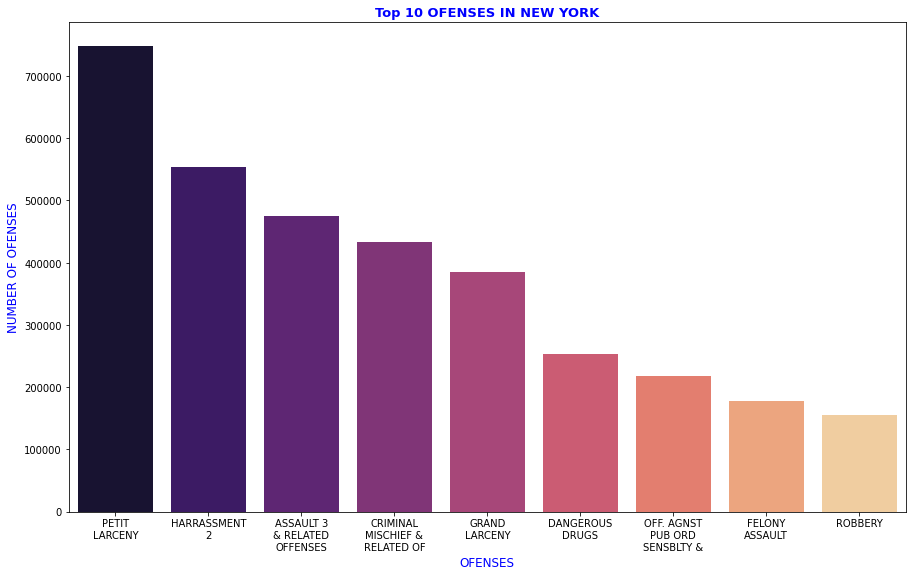

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt


# x = ['Grand Larceny', 'Criminal Mischief and Related Ofense', 'Assault 3 and Related Ofenses', 'Harrasment', 'Petit Larceny']
# y = [384976, 433287, 474666, 553289, 748825]


y = ny['OFNS_DESC'].value_counts().tolist()[0:9]
x = ny['OFNS_DESC'].value_counts().index.tolist()[0:9]



fig, axs = plt.subplots(figsize = (15, 9))
plot = sns.barplot(x, y, palette = 'magma')

axs.set_title('Top 10 OFENSES IN NEW YORK', color = 'b', fontsize = 13, weight = 'bold')
axs.set_xlabel('OFENSES', color = 'b', fontsize = 12)
axs.set_ylabel('NUMBER OF OFENSES', color = 'b', fontsize = 12)

# for k in plot.get_xticklabels():
#         k.set_rotation(45)



wrap_labels(axs, 10)
axs.figure

plt.show()


In [101]:
ny['BORO_NM'].value_counts()

BROOKLYN         1313723
MANHATTAN        1046219
BRONX             952314
QUEENS            868273
STATEN ISLAND     202507
Name: BORO_NM, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


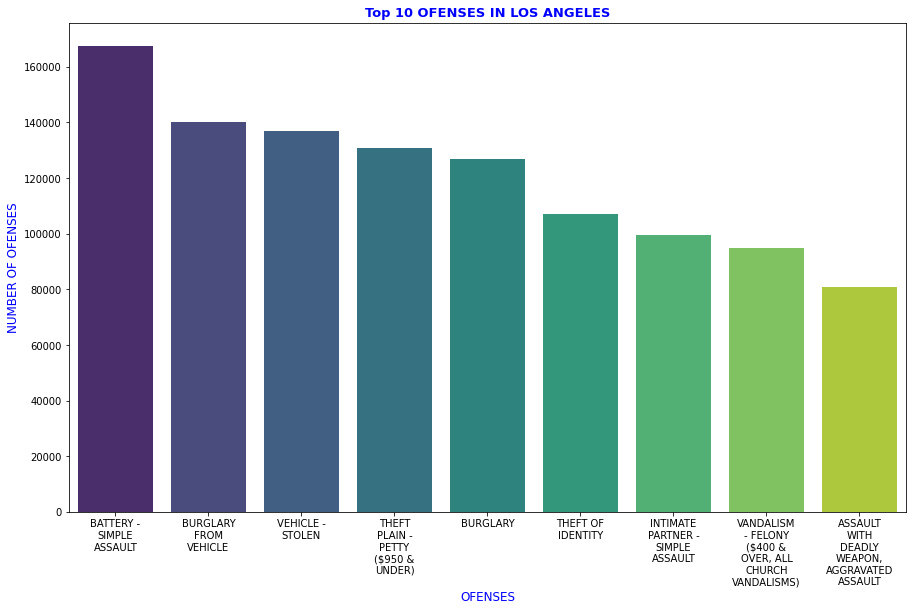

In [102]:
# x = ['Burglary', 'Theft Plain - Petty ($950 & under)', 'Vehicle - Stolen', 'Burglary From Vehicle', 'Battery - Simple Assault']
# y = [126700, 130817, 137041, 140198, 167544]

y = la['Crm Cd Desc'].value_counts().tolist()[0:9]
x = la['Crm Cd Desc'].value_counts().index.tolist()[0:9]



fig, axs = plt.subplots(figsize = (15, 9))
plot = sns.barplot(x, y, palette = 'viridis')

axs.set_title('Top 10 OFENSES IN LOS ANGELES', color = 'b', fontsize = 13, weight = 'bold')
axs.set_xlabel('OFENSES', color = 'b', fontsize = 12)
axs.set_ylabel('NUMBER OF OFENSES', color = 'b', fontsize = 12)

# for k in plot.get_xticklabels():
#         k.set_rotation(45)



wrap_labels(axs, 10)
axs.figure

plt.show()